In [1]:
import copernicusmarine

/opt/anaconda3/envs/cmto2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## armor3D

In [2]:
dsa=copernicusmarine.open_dataset(
  dataset_id="dataset-armor-3d-rep-weekly",
  dataset_version="202012",
  variables=["so", "to"],
  minimum_longitude=-65,
  maximum_longitude=-65,
  minimum_latitude=32,
  maximum_latitude=32,  
  minimum_depth=250,
  maximum_depth=250,
)

Fetching catalog: 100%|███████████████████████████| 3/3 [00:27<00:00,  9.03s/it]


INFO - 2024-06-25T09:21:37Z - You forced selection of dataset version "202012"
INFO - 2024-06-25T09:21:37Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-06-25T09:21:41Z - Service was not specified, the default one was selected: "arco-time-series"


## Glorys

In [4]:
dsg=copernicusmarine.open_dataset(
  dataset_id="cmems_mod_glo_phy_my_0.083deg_P1D-m",
  dataset_version="202311",
  variables=["so", "thetao"],
  minimum_longitude=-65,
  maximum_longitude=-65,
  minimum_latitude=32,
  maximum_latitude=32,  
  minimum_depth=250,
  maximum_depth=250
)

INFO - 2024-06-25T09:22:58Z - You forced selection of dataset version "202311"
INFO - 2024-06-25T09:22:58Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-06-25T09:23:00Z - Service was not specified, the default one was selected: "arco-time-series"


In [7]:
dsa.to_netcdf('armor3d_weekly_point-1993-2022.nc')

In [6]:
dsg

<xarray.Dataset> Size: 167kB
Dimensions:    (depth: 1, latitude: 1, longitude: 1, time: 10408)
Coordinates:
  * depth      (depth) float32 4B 266.0
  * latitude   (latitude) float32 4B 32.0
  * longitude  (longitude) float32 4B -65.0
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    so         (time, depth, latitude, longitude) float32 42kB ...
    thetao     (time, depth, latitude, longitude) float32 42kB ...
Attributes: (12/24)
    Conventions:        CF-1.4
    bulletin_date:      2021-07-07 00:00:00
    bulletin_type:      operational
    comment:            CMEMS product
    domain_name:        GL12
    easting:            longitude
    ...                 ...
    northing:           latitude
    references:         http://www.mercator-ocean.fr
    source:             MERCATOR GLORYS12V1
    title:              daily mean fields from Global Ocean Physics Analysis ...
    z_max:              5727.9169921875
    z_min:              0.49402499198913574

In [8]:
dsg.to_netcdf('glorys_daily_point-1993-2021.nc')

In [17]:
import matplotlib.pyplot as plt

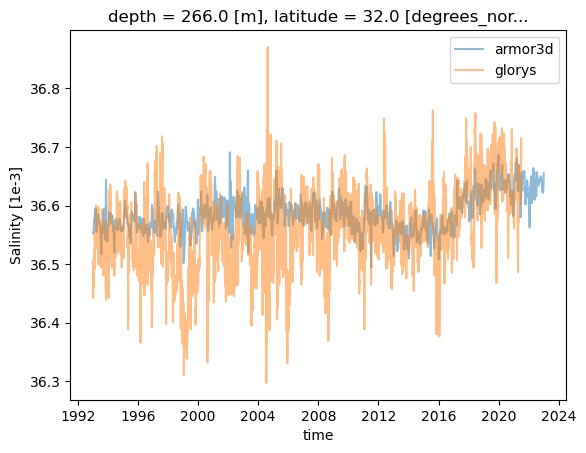

In [18]:
dsa['so'].squeeze().plot.line(alpha=0.5,label='armor3d')
dsg['so'].squeeze().plot.line(alpha=0.5,label='glorys')
plt.legend()

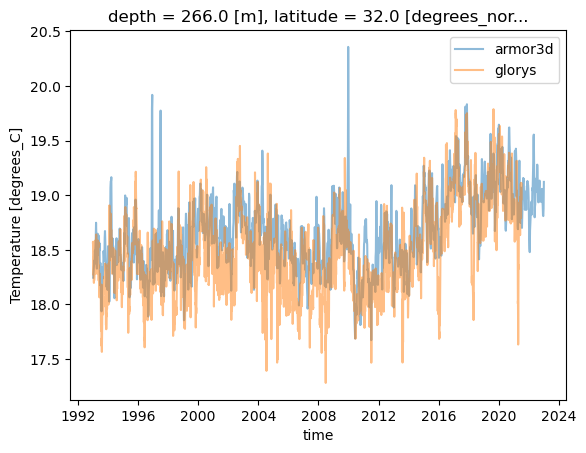

In [19]:
dsa['to'].squeeze().plot.line(alpha=0.5,label='armor3d')
dsg['thetao'].squeeze().plot.line(alpha=0.5,label='glorys')
plt.legend()